# **K means model generation notebook**
This ipython notebook was used to extract vgg features of the cropped blobs (from the surveillence video) and fit a kmeans model.

In [0]:
# python 2
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/Colab\ Notebooks/assign4
# !tar -xzf Dataset.tar.gz
# !ls
# !mkdir images
# !unzip data.zip -d images/

In [2]:
from imutils import paths
import random
import cv2
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


## **Load Dataset**

In [10]:
# from argparse import Namespace
# mydict={'dataset':'images/data'}
# args = Namespace(**mydict)

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
im_size=128

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('images/data')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
        # load the image, resize it to 64x64 pixels (the required input
        # spatial dimensions of SmallVGGNet), and store the image in the
        # data list
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (im_size, im_size))
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(X_train, X_test, _, _) = train_test_split(data,labels, test_size=0.25, random_state=42)


[INFO] loading images...


('Training shape:', (368, 128, 128, 3))
(368, 'sample,', 128, 'x', 128, 'size RGB image.\n')
('Test shape:', (123, 128, 128, 3))
(123, 'sample,', 128, 'x', 128, 'size RGB image.\n')
Examples:


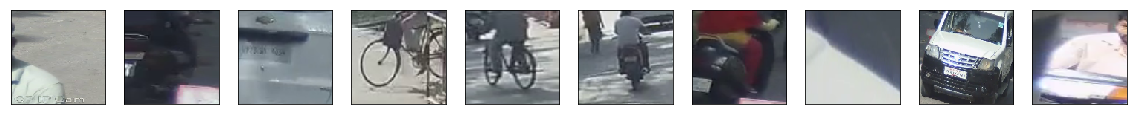

In [11]:
# About Dataset:
img_size = X_train.shape[1] # 64
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size RGB image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size RGB image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display some data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## **VGG+kmeans**
The plots of this cell show that persons have been clustered into class 0 and vehicle (car) into class 1. Class 2 mostly has background corresponds to background patches.

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
# model.summary()

vgg16_feature = model.predict(X_train)

In [0]:
vgg16_feature_list=[]
for idx in range(len(vgg16_feature)):
  vgg16_feature_np = np.array(vgg16_feature[idx,:,:,:])
  vgg16_feature_list.append(vgg16_feature_np.flatten())

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(vgg16_feature_list)
test = model.predict(X_test)


In [0]:
vgg16_feature_list=[]
for idx in range(len(test)):
  vgg16_feature_np = np.array(test[idx,:,:,:])
  vgg16_feature_list.append(vgg16_feature_np.flatten())
  
pred = kmeans.predict(vgg16_feature_list)
# print(pred.shape)

0


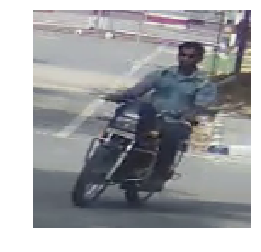

2


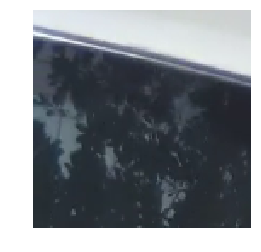

0


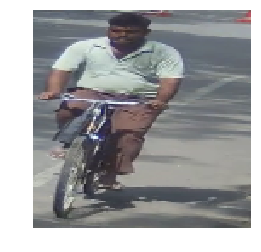

0


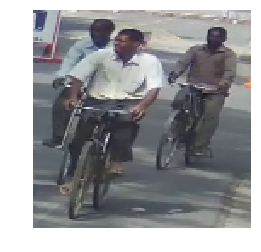

1


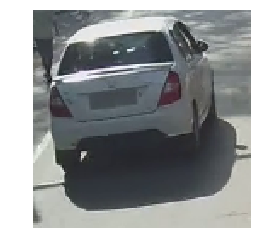

0


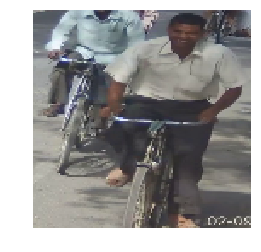

2


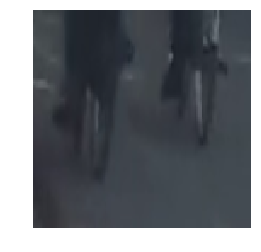

2


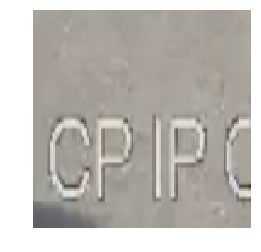

2


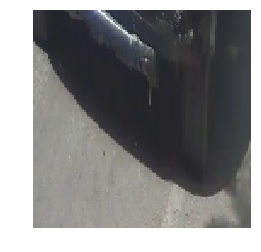

2


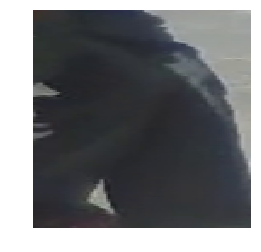

2


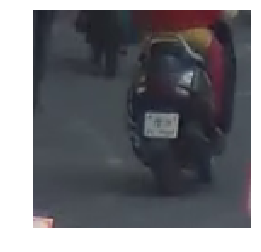

0


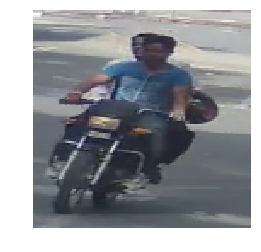

2


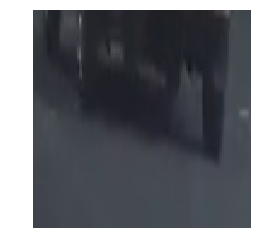

2


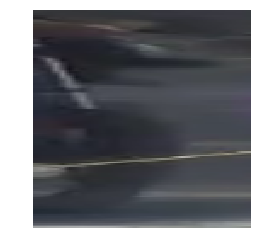

2


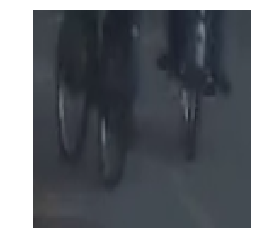

0


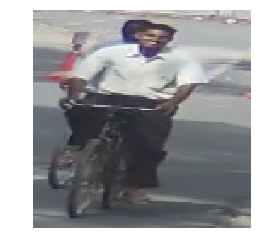

1


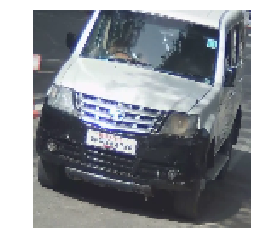

0


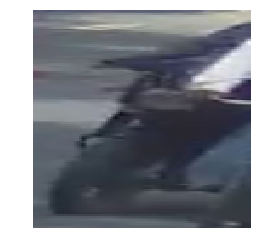

2


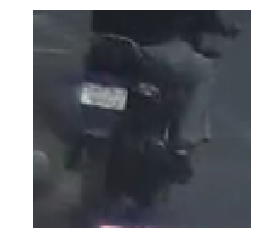

0


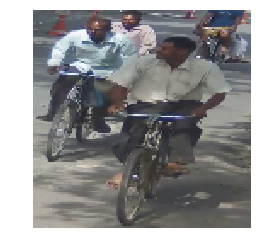

In [24]:
for i in range(20):
    plt.imshow(X_test[i]);
    print(pred[i])
    plt.axis('off')
    plt.show()

## **Save k means Model**

In [10]:
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "joblib_model.pkl"  
joblib.dump(kmeans, joblib_file)

['joblib_model.pkl']

In [0]:
# Load from file
# joblib_model = joblib.load(joblib_file)